Tasks

- Users from which countries have made the most successful bookings? Specify the top 5.
- How many nights do hotels of different types book on average?
- Sometimes the type of room received by the client (assigned_room_type) differs from the one originally booked (reserved_room_type). This can happen, for example, due to overbooking. How many such observations were found in the dataset?

- Review your planned arrival dates. – What month was the most successful booking in 2016? Did the most popular month change in 2017? - Group the data by years and check which month City Hotel bookings were canceled most often in each period
- Look at the numerical characteristics of three variables: adults, children and babies. Which one has the largest average value?

- Create a "total_kids" column by concatenating children and babies. For which type of hotels did the average value of the variable turn out to be the largest?
- Create a "has_kids" variable that takes the value True if the client specified at least one child during the booking (total_kids), otherwise False. Calculate the ratio of the number of users who left to the total number of customers, expressed as a percentage (churn rate). Indicate which group has the highest rate.


The data we have:

- Hotel – (City Hotel or Resort Hotel)  
- Is canceled – status (1) или нет (0); not canceled means success
- Lead time – the day qty between  the booking day and arrival day
- Arrival full date 
- Arrival date year   
- Arrival date month   
- Arrival date week number
- Arrival date day of month 
- Stays in weekend nights – qty of weekends (Suturday and Sunday) that were booked by customer 
- Stays in week nights – qty of days (Monday- Friday), that were booked by customer 
- Stays total nights – total number of days (summ of Stays in weekend nights and tays in week nights )
- Adults- number of adults
- Children – number of children
- Babies – number of babies 
- Meal – meal type
- Country – where is the customer from
- Reserved room type
- Assigned room type - room type (could differ from the type of booking)
- Customer type - booking type
- Reservation status – the latest booking status: Canceled ; Check-Out ; No-Show 
- Reservation status date – the latest updated status 

In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(13.7,8.27)})


In [2]:
path = './2_bookings.csv' # set the file path

In [3]:
df = pd.read_csv(path, sep=';')# read first 10 rows in file using separation between columns as ";"

In [4]:
#let's rename columns in a common way

In [5]:
rename_cloumns = {}
for col in df.columns:
    rename_cloumns[col] = col.replace(" ", "_").lower()

In [6]:
df = df.rename(columns = rename_cloumns)

In [7]:
df.dtypes # check data types in table

hotel                         object
is_canceled                    int64
lead_time                      int64
arrival_full_date             object
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
stays_total_nights             int64
adults                         int64
children                     float64
babies                         int64
meal                          object
country                       object
reserved_room_type            object
assigned_room_type            object
customer_type                 object
reservation_status            object
reservation_status_date       object
dtype: object

In [466]:
#there are dates columns but now the type is wrong

In [467]:
df[["arrival_full_date","reservation_status_date"]] = df[["arrival_full_date","reservation_status_date"]].apply(pd.to_datetime)

1. TOP-5 countries according to succesfull  booking amount

In [468]:
top_5 = df.query('reservation_status == "Check-Out"')\
          .groupby("country", as_index = False)\
          .agg({"hotel":"count"})\
          .rename(columns ={"hotel":"qty"})\
          .sort_values(by ="qty", ascending = False)\
          .head(5)

Probably PRT (Portugal) is famous for Resort hotels, but GBR (G.Britain) and FRA(France) are popular with City hotels. Let's check the number of each hotel type in those top-5 countries. 

In [469]:
df.head(7)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


In [470]:
hotels_countries = df.query("country == ('PRT', 'GBR', 'FRA', 'ESP', 'DEU')")\
                     .groupby(['hotel','country'], as_index = False)\
                     .agg({"meal":"count"})\
                     .rename(columns ={"meal":"hotel_amount"})
hotels_countries

,hotel,country,hotel_amount
0,City Hotel,DEU,6084
1,City Hotel,ESP,4611
2,City Hotel,FRA,8804
3,City Hotel,GBR,5315
4,City Hotel,PRT,30960
5,Resort Hotel,DEU,1203
6,Resort Hotel,ESP,3957
7,Resort Hotel,FRA,1611
8,Resort Hotel,GBR,6814
9,Resort Hotel,PRT,17630


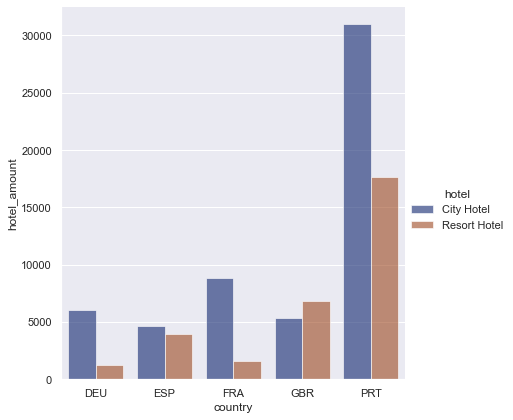

In [471]:
sns.catplot(
    data=hotels_countries, kind="bar",
    x="country", y="hotel_amount", hue="hotel",
   palette="dark", alpha=.6, height=6
)

Surprisingly, even in PRT and ESP there are more City hotels than Resort.

2. What is the average qty of nights in bookings in the different types of hotels?   

In [472]:
df['ttl_days']=df['stays_in_weekend_nights'] + df['stays_in_week_nights'] # calculate ttl numner of week and weekend days

In [473]:
av_nights = df.groupby("hotel", as_index = False).agg({"ttl_days":"mean"}).round()
av_nights

,hotel,ttl_days
0,City Hotel,3.0
1,Resort Hotel,4.0


3. Sometimes assigned_room_type is not the same as reserved_room_type. It may happen in case of overbooking.
 How many of such cases are in df? What dates?

In [474]:
len(df.loc[df.assigned_room_type != df.reserved_room_type])
#calculate the number of rows where the values are not same

14917

In [475]:
df.query('assigned_room_type != reserved_room_type')\
.groupby(["arrival_full_date","hotel"], as_index = False)\
.agg({"country":"count"})\
.rename(columns = {"country":"qty"})\
.sort_values(by ="qty", ascending = False)\
.head(10) #top 10 results when the room type was not the same as it was planned, when it happened and where(hotel)

,arrival_full_date,hotel,qty
688,2016-06-24,City Hotel,93
652,2016-06-06,City Hotel,69
165,2015-10-02,City Hotel,64
151,2015-09-25,City Hotel,61
1099,2017-01-16,Resort Hotel,60
193,2015-10-16,City Hotel,59
262,2015-11-21,Resort Hotel,57
192,2015-10-15,Resort Hotel,55
181,2015-10-10,City Hotel,48
123,2015-09-11,City Hotel,47


4. What are the planned arrival dates? What month was the top in 2016? Is it same in 2017? What is the main destination?

In [484]:
arrivals = df.query("country == ('PRT', 'GBR', 'FRA', 'ESP', 'DEU')")\
             .groupby(['arrival_date_year','arrival_date_month','country'], as_index = False)\
             .agg({"arrival_date_week_number":"count"})\
             .rename(columns = {"arrival_date_week_number":"qty"})\
             .sort_values(by = 'qty', ascending = False)

In [486]:
table = pd.pivot_table(arrivals, values='qty', index=['arrival_date_year','country'],
        columns=['arrival_date_month'], fill_value=0)
table = table[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
table

arrival_date_month         January  February  March  April   May  June  July  \
arrival_date_year country                                                      
2015              DEU            0         0      0      0     0     0    18   
                  ESP            0         0      0      0     0     0   186   
                  FRA            0         0      0      0     0     0    20   
                  GBR            0         0      0      0     0     0   144   
                  PRT            0         0      0      0     0     0  2077   
2016              DEU           85       125    284    427   449   374   295   
                  ESP          165       316    581    268   189   204   352   
                  FRA          141       322    322    516   544   387   395   
                  GBR          117       231    403    452   621   533   481   
                  PRT         1160      2105   2077   2331  2277  2432  1566   
2017              DEU          131       163    399    466   424   427   519   
                  ESP          301       376    180    402   202   213   383   
                  FRA          278       489    651    558   603   429   368   
                  GBR          250       562    585    695   936   845   711   
                  PRT         1502      1561   1649   1703  2040  1943  1262   

arrival_date_month         August  September  October  November  December  
arrival_date_year country                                                  
2015              DEU          69        129      157        74        77  
                  ESP         497        314      312       194       429  
                  FRA         180        394      323       229       202  
                  GBR         109        393      462       129       119  
                  PRT        2445       2888     2870      1296      1731  
2016              DEU         421        453      583       218       151  
                  ESP         653        264      278       248       506  
                  FRA         603        395      625       484       431  
                  GBR         488        743      863       391       262  
                  PRT        1407       1881     2038      1720      1327  
2017              DEU         369          0        0         0         0  
                  ESP         555          0        0         0         0  
                  FRA         526          0        0         0         0  
                  GBR         604          0        0         0         0  
                  PRT        1302          0        0         0         0

5. Group data by hotels, which month was the most cancelled for City Hotel.

In [380]:
#another way
df.groupby(["arrival_date_year",'arrival_date_month']).is_canceled.sum().groupby('arrival_date_year').nlargest(1)

arrival_date_year  arrival_date_year  arrival_date_month
2015               2015               September             2094
2016               2016               October               2514
2017               2017               May                   2762
Name: is_canceled, dtype: int64


6. Look at the numerical characteristics of three variables: adults, children and babies. Which one has the largest average value?

In [355]:
df[['children','babies','adults']].mean()

children    0.103890
babies      0.007949
adults      1.856403
dtype: float64

7. Create a total_kids column by concatenating children and babies. For which type of hotels did the average value of the variable turn out to be the largest?

In [356]:
df['total_kids']= df['children'] + df['babies'] #create new col with info from 'children' and 'babies'

In [357]:
df.groupby(['hotel']).total_kids.mean()

hotel
City Hotel      0.096311
Resort Hotel    0.142586
Name: total_kids, dtype: float64


8. Create a has_kids variable that takes the value True if the client specified at least one child during the booking (total_kids), otherwise False. Calculate the ratio of the number of users who left to the total number of customers, expressed as a percentage (churn rate). Indicate which group has the highest rate.

In [358]:
def has_kids(x): #function that checks id the value > 0 
    if x > 0:
     return True
    else: 
     return False

In [23]:
df['has_kids']= df['total_kids'].apply(has_kids)# create new col and applying created function has_kids

In [24]:
df.total_kids.astype(bool).value_counts()

False    110054
True       9336
Name: total_kids, dtype: int64

In [25]:
rates = df.groupby('has_kids')['is_canceled'].value_counts(normalize=True)
rates 

has_kids  is_canceled
False     0              0.627787
          1              0.372213
True      0              0.650772
          1              0.349228
Name: is_canceled, dtype: float64

Summary: 
- Top destinaton for vacation in our dataset is Portugal (more hotels, more visits within the whole year).
Most of tourists don't have children in their trip. But the difference is only 16% between tourists with children and without. Usually people stay 4 nights in Resort type of hotels and only 3 nights in City hotel.
- The advantage of children for hotels- there are less cancels of bookings from tourists with children. And sure people more often change the room type they booked before in advance in the City hotels.